In [1]:
import graphlab

In [2]:
wines = graphlab.SFrame('winequality-red.csv')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1475554254.log


This non-commercial license of GraphLab Create for academic use is assigned to laddng12@wfu.edu and will expire on September 20, 2017.


Finished parsing file /Users/nladd/Google Drive/CSC-391-ML/Lab1/Somm/winequality-red.csv

Parsing completed. Parsed 100 lines in 0.030328 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,float,float,int,int,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/nladd/Google Drive/CSC-391-ML/Lab1/Somm/winequality-red.csv

Parsing completed. Parsed 1599 lines in 0.015734 secs.

In [3]:
wines

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
7.4,0.7,0.0,1.9,0.076,11,34
7.8,0.88,0.0,2.6,0.098,25,67
7.8,0.76,0.04,2.3,0.092,15,54
11.2,0.28,0.56,1.9,0.075,17,60
7.4,0.7,0.0,1.9,0.076,11,34
7.4,0.66,0.0,1.8,0.075,13,40
7.9,0.6,0.06,1.6,0.069,15,59
7.3,0.65,0.0,1.2,0.065,15,21
7.8,0.58,0.02,2.0,0.073,9,18
7.5,0.5,0.36,6.1,0.071,17,102


In [4]:
wines.show(view = "Scatter Plot", x = 'alcohol', y = 'quality')

Canvas is accessible via web browser at the URL: http://localhost:53356/index.html
Opening Canvas in default web browser.


In [5]:
train_data,test_data = wines.random_split(0.8, seed = 0)

In [6]:
alcohol_model = graphlab.linear_regression.create(train_data, target = 'quality', features = ['alcohol'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1267

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

In [7]:
print alcohol_model.evaluate(test_data)

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.004099     | 2.858385           | 0.708894      |

{'max_error': 2.747504268027688, 'rmse': 0.7143871636521631}


+-----------+----------+--------------+--------------------+---------------+

In [8]:
import matplotlib.pyplot as plt

SUCCESS: Optimal solution found.

In [9]:
plt.plot(test_data['alcohol'], test_data['quality'], '.', test_data['alcohol'], alcohol_model.predict(test_data), '-')

In [10]:
alcohol_model.get('coefficients')

name,index,value,stderr
(intercept),None,1.79275135558,0.197083569471
alcohol,None,0.36960307593,0.0188245903544


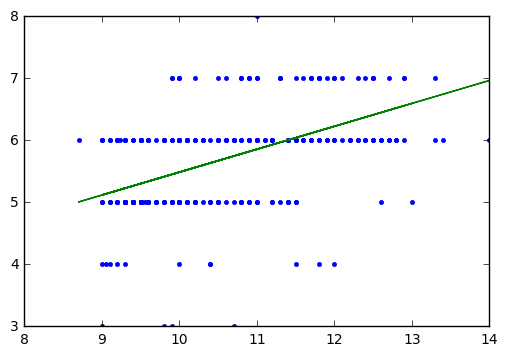

In [11]:
plt.show()

In [47]:
my_features = ['density', 'volatile acidity', 'pH', 'alcohol', 'chlorides']

In [48]:
wines[my_features].show()

Canvas is updated and available in a tab in the default browser.


In [49]:
wines.show(view='BoxWhisker Plot', x='alcohol', y='quality')

Canvas is updated and available in a tab in the default browser.


In [50]:
my_features_model = graphlab.linear_regression.create(train_data, target='quality', features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 1267

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 6

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.002959     | 2.522658           | 0.661729      |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [51]:
print alcohol_model.evaluate(test_data)

{'max_error': 2.747504268027688, 'rmse': 0.7143871636521631}


In [52]:
print my_features_model.evaluate(test_data)

{'max_error': 2.4907202395087538, 'rmse': 0.6721921798351667}
